 The data set I will be analyzing contains comprehensive data on exoplanets discovered and the stars they orbit.
 I chose this data set because I find astronomy fascinating. I thought it would be interesting to work with data about the universe and see what else is out there. 

 Three questions I have are...

    1. How many of the stars contain an actual system of planets with more than one like our own solar system?

    2. What are these planets made of? What elements are on them?

    3. What are the densities of these planets? What is the relationship between the mass and size?

In [35]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('kepler.csv')

In [37]:
# Check how many exoplanets are in the data set.

df_mass = df['# name']
df_mass.describe()

count            3732
unique           3732
top       1RXS 1609 b
freq                1
Name: # name, dtype: object

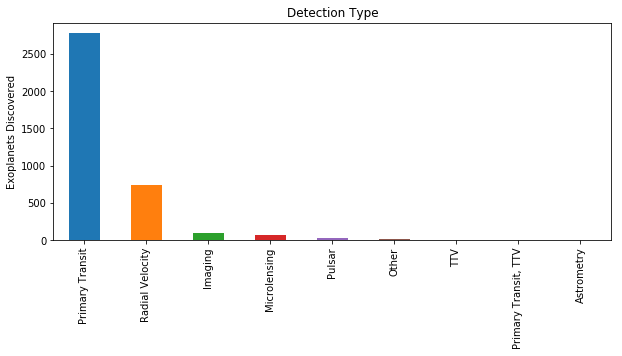

In [38]:
# Let's look at the methods of detection to find out how they were discovered.

column = 'detection_type'
plt.figure(figsize=(10, 4))
df[column].value_counts().plot.bar()
plt.title("Detection Type")
plt.ylabel("Exoplanets Discovered")
plt.show()

# We can see that the Primary Transit method is most common. This method uses the Kepler space telescope to 
# scan a segment of the sky for stars. When an exoplanet orbits in front of the star, it dims and is detected 
# by Kepler.


In [39]:
# 1. How many of the stars contain an actual system of planets with more than one like our own solar system?

#Shows how many planets are orbiting the star.

starname = "star_name"
(df[starname].value_counts().describe())



count    2793.000000
mean        1.336198
std         0.754478
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: star_name, dtype: float64

In [40]:
# The majority just have one. Lets narrow it down to 5 or more planets.

# Create columns for star and number of planets
starname = "star_name"
planets_per_star = (df[starname].value_counts())

# Remove stars with less than 5 planets
greaterthanfive = planets_per_star[planets_per_star >= 5]

print (greaterthanfive)

Kepler-90     8
TRAPPIST-1    7
HD 219134     6
GJ 667 C      6
HD 34445      6
HD 40307      6
HD 10180      6
Kepler-80     6
Kepler-20     6
Kepler-11     6
Kepler-292    5
Kepler-150    5
Kepler-238    5
Kepler-84     5
Kepler-154    5
Kepler-55     5
Kepler-186    5
Kepler-33     5
Kepler-444    5
55 Cnc        5
Kepler-62     5
Kepler-169    5
Kepler-296    5
HIP 41378     5
Kepler-102    5
Name: star_name, dtype: int64


In [41]:
# We now have a list of stars with 5 or more planets in orbit. 
# A lot of these stars are named after the Kepler space telescope which discovered them.
# Lets see what percentage that is.

planets_per_star.index.str.replace(r'[^a-zA-Z]+', '').value_counts(normalize = True).head(5)

#Over 50% of the stars.


Kepler    0.574293
HD        0.142499
WASP      0.046903
HATP      0.020408
HATS      0.015754
dtype: float64

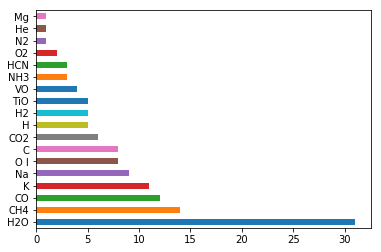

In [42]:
# Some of these contain water! Perhaps they contain life as well.
# We can see that there is H2O grouped in with some other elements. 
# Let's find out how many of these planets have water.

pd.Series(', '.join(df.molecules.dropna()).split(', ')).value_counts().plot.barh()

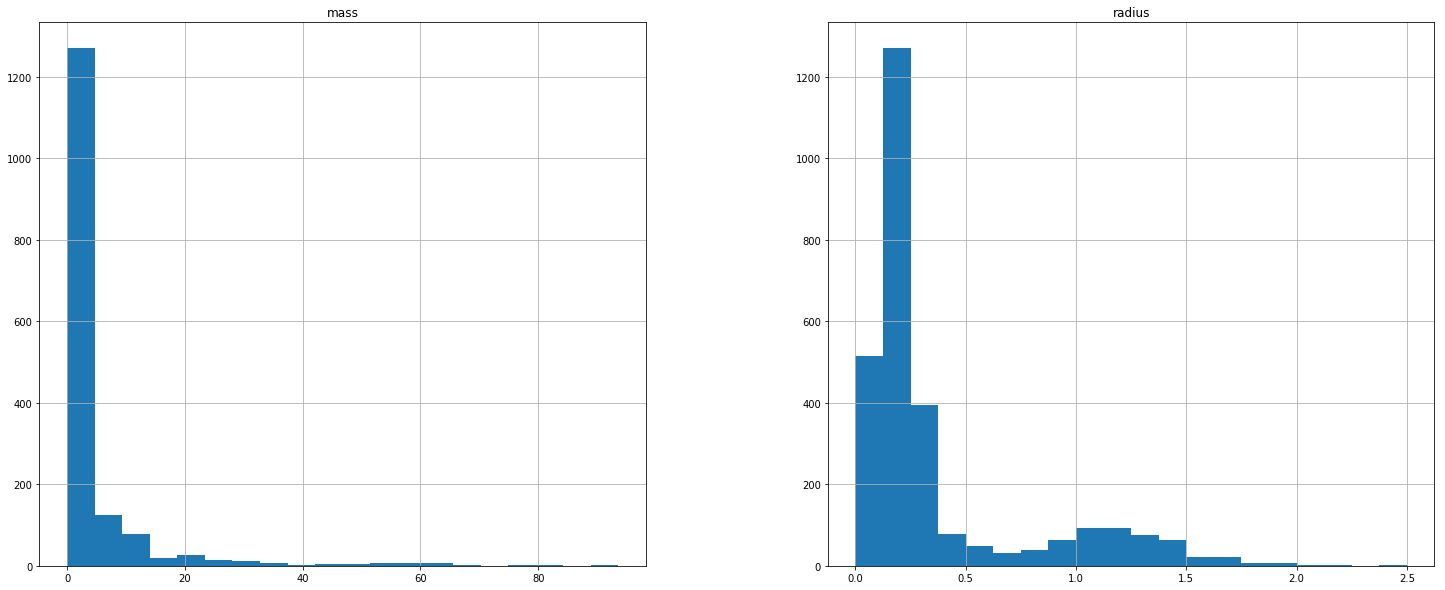

In [43]:
# 31 of the planets with molecular data have water on them.

# 3. What are the densities of these planets? What is the relationship between the mass and size?

# Let's take a histogram to see where these values are.

hist = df.hist(column = ['radius', 'mass'],
              figsize = [25, 10],
                 bins = 20,
              )

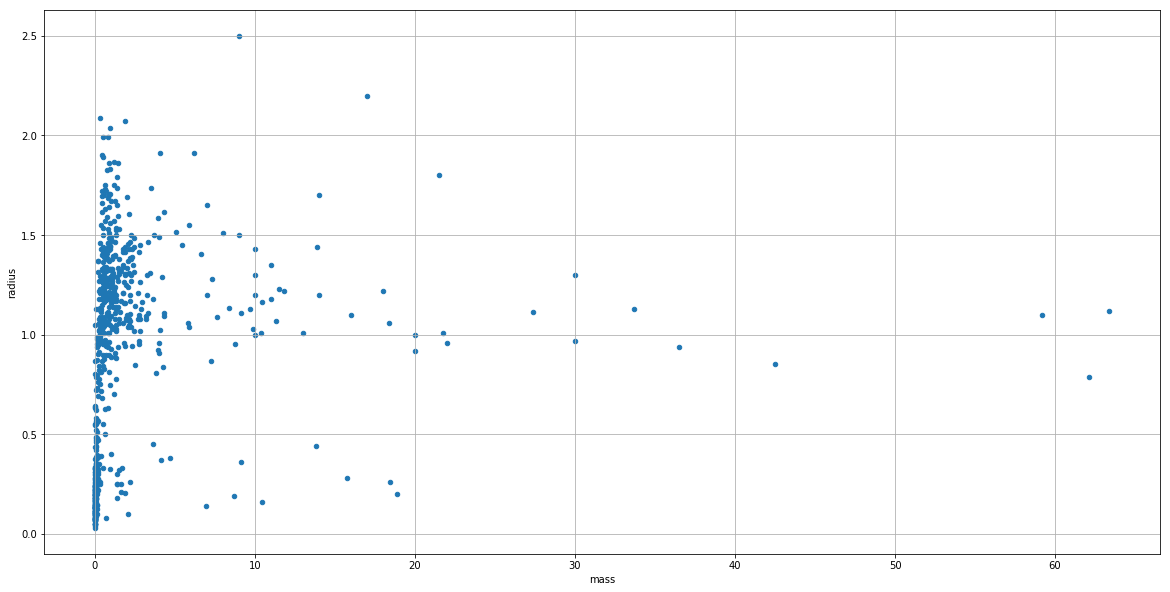

In [44]:
# The mass and radius are in terms of the planet Jupiter. It looks like the majority of exoplanets with this data 
# are less than half the radius of jupiter.

density = df.plot.scatter(x = 'mass',
                          y = 'radius',
                       grid = True,
                    figsize = [20, 10],
                          )

In [45]:
# This scatter plot shows the over all desities of the exoplanets with mass and radius data.

In [46]:
# Let's check the stats for the mass and radius.

df_radius = df['radius']
df_radius.describe()

count    2826.000000
mean        0.381838
std         0.412572
min         0.000002
25%         0.140000
50%         0.210000
75%         0.332750
max         2.500000
Name: radius, dtype: float64

In [47]:
df_mass = df['mass']
df_mass.describe()

count    1586.000000
mean        4.246192
std         9.706793
min         0.000002
25%         0.117500
50%         0.945500
75%         3.097500
max        93.600000
Name: mass, dtype: float64

The mean radius and mass in terms of Jupiter are 0.38 and 4.25 respectively. So the average exoplanet is 38% the     size of Jupiter but 425% more massive. This leads me to believe that 
the average exoplanet is rocky and not gaseous like Jupiter. I would have liked to convert the mass and radius measurments into more usable units to find out the percentage of rocky and gaseous planets.

 For further research, I would like to take a deeper look into how the Kepler telescope found these exoplanets. It would be really interesting to try and replicate the machine learning algorithm used to look for the primary transit of a planet in front of a star or the wobble of a star due to the gravitational pull from an orbiting body.